In [1]:
#importing Libraries
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [5]:
#importing dataset
data=pd.read_csv("spam.csv")

In [7]:
data.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
data.isna().sum()


Category    0
Message     0
dtype: int64

In [11]:
data.columns=('Category' , 'Message')

In [13]:
data.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [21]:
data['Category'].value_counts()




Category
ham     4825
spam     747
Name: count, dtype: int64

<Axes: xlabel='Category'>

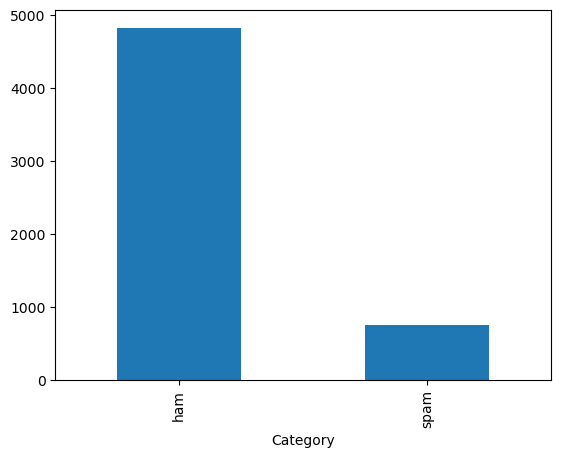

In [24]:
data['Category'].value_counts().plot(kind='bar')


In [28]:
data['Spam']=data['Category'].apply(lambda x:1 if x=='spam' else 0)

In [30]:
data.columns


Index(['Category', 'Message', 'Spam'], dtype='object')

In [32]:
data.head(10)

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


In [40]:
x=np.array(data["Message"])
y=np.array(data["Spam"])
cv= CountVectorizer()
X=cv.fit_transform(x)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.30, random_state=42)

clf= MultinomialNB()
clf.fit(X_train,y_train)

                                                   

MultinomialNB()

In [ ]:
sample= input('Enter a message:')
data= cv.transform([sample]).toarray()
print(clf.predict(data))


In [46]:
clf.score(X_test,y_test)

0.9850478468899522